<a href="https://colab.research.google.com/github/harshitha-999/project01/blob/master/Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRAINING DATA**

In [ ]:
import numpy as np
import pandas as pd
import re
import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
traindata = pd.read_csv('/content/drive/MyDrive/ml/train.csv')
traindata.rename(columns={'Is_Response':'Status'},inplace=True)
traindata.head()

,User_ID,Description,Browser_Used,Device_Used,Status
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Status        38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


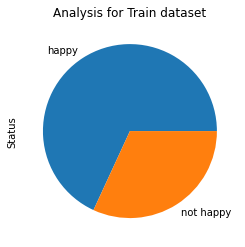

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
round(traindata.Status.value_counts(normalize=True)*100,20).plot(kind='pie')
plt.title('Analysis for Train dataset')
plt.show()

Data Preprocessing

In [ ]:
traindata.shape

(38932, 5)

In [ ]:
def removing_apostrophe(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"\'t've", " not have", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'clock", "f the clock", text)
    text = re.sub(r"\'cause", " because", text)
    text = re.sub(r"n\'t", " not", text) 
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

  


In [ ]:

def clean_data(text):
  text=removing_apostrophe(text)
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('[""''_]', '', text)
  text = re.sub('\n', '', text)
  


  return text

new = lambda x :clean_data(x)

In [ ]:
traindata['NewDescription'] = pd.DataFrame(traindata.Description.apply(new))
traindata.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [ ]:
traindata.head(50)


,Description,Status,NewDescription
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

traindata["NewDescription"] = traindata["NewDescription"].apply(lambda text: remove_stopwords(text))
traindata.head(50)

,Description,Status,NewDescription
0,The room was kind of clean but had a VERY stro...,not happy,room kind clean strong smell dogs generally av...
1,I stayed at the Crown Plaza April -- - April -...,not happy,stayed crown plaza april april staff friendly ...
2,I booked this hotel through Hotwire at the low...,not happy,booked hotel hotwire lowest price could find g...
3,Stayed here with husband and sons on the way t...,happy,stayed husband sons way alaska cruise loved ho...
4,My girlfriends and I stayed here to celebrate ...,not happy,girlfriends stayed celebrate th birthdays plan...
5,We had - rooms. One was very nice and clearly ...,happy,rooms one nice clearly updated recently clean ...
6,My husband and I have stayed in this hotel a f...,not happy,husband stayed hotel times though fanciest hot...
7,My wife & I stayed in this glorious city a whi...,happy,wife stayed glorious city back sf expensive fo...
8,My boyfriend and I stayed at the Fairmont on a...,happy,boyfriend stayed fairmont recent trip san fran...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location definately pric...
